In [1]:
import numpy as np
import argparse
import cv2
from cnn.neural_network import CNN
from keras.utils import np_utils
from keras.optimizers import SGD
# from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# Now each image rows and columns are of 28x28 matrix type.
img_rows, img_columns = 28, 28


In [6]:
# Defing and compile the SGD optimizer and CNN model
print('\n Compiling model...')
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
clf = CNN.build(width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path='model/cnn_weights_5.hdf5')
clf.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])


 Compiling model...


c:\Users\parac\anaconda3\envs\sudoku\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 2s 2s/step
[[1.00000000e+00 1.03476572e-09 1.36390526e-08 1.73477656e-11
  1.47447013e-10 1.05029895e-10 5.17220089e-09 2.74692491e-09
  1.70901799e-08 1.12193499e-08]]


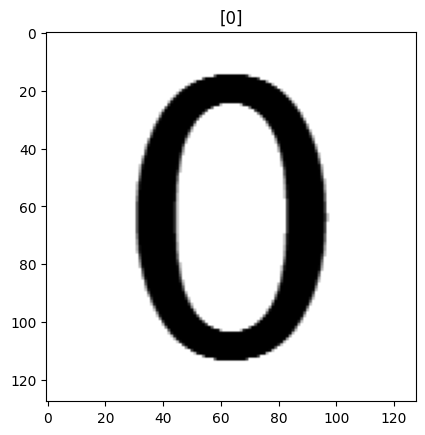

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 9ms/step
[[2.3700036e-07 4.7273025e-01 7.3189891e-05 1.3533224e-04 4.9604268e-06
  3.1690840e-07 9.9843746e-08 5.2705145e-01 9.9672923e-07 3.1296806e-06]]


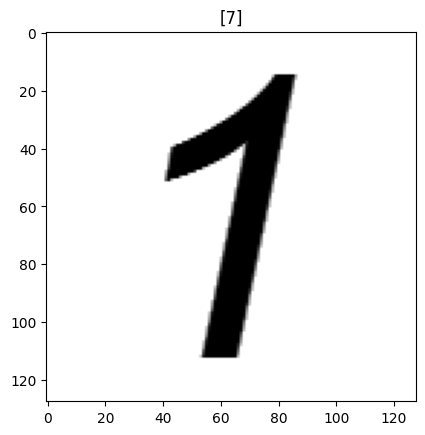

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 26ms/step
[[5.6371762e-05 5.1834545e-06 9.9991357e-01 9.6342064e-06 5.7770821e-10
  4.3319456e-10 8.3485991e-09 1.4400395e-05 6.2212996e-07 2.6442183e-07]]


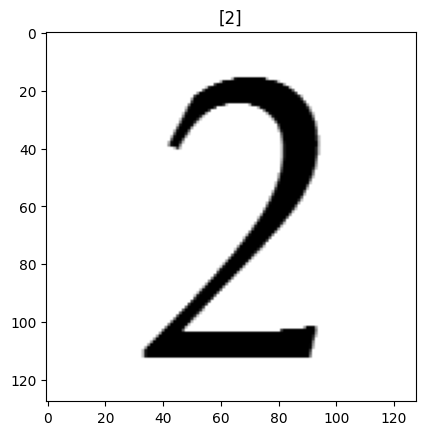

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 14ms/step
[[1.65238420e-16 2.12869587e-12 2.27708257e-14 9.99984264e-01
  3.42668396e-16 1.57565300e-05 8.72984025e-16 1.01457454e-10
  7.77943045e-14 4.55087270e-12]]


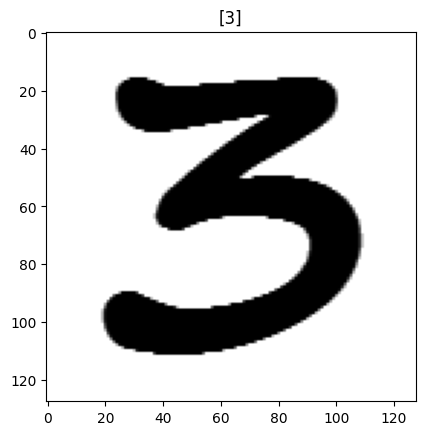

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 7ms/step
[[3.9118374e-12 5.4671010e-09 3.0369812e-08 2.4524894e-12 9.9999964e-01
  1.9572128e-12 5.0036052e-11 3.6754221e-07 1.5586778e-11 4.3519432e-08]]


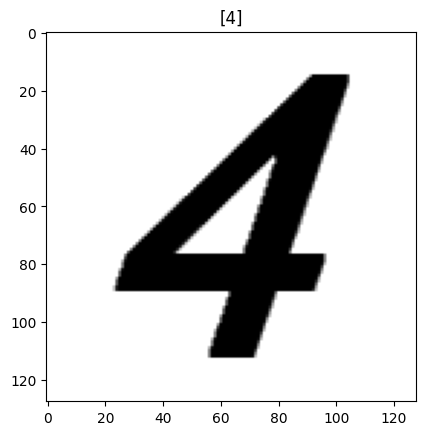

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 17ms/step
[[1.7207557e-13 3.5435344e-12 1.0605874e-14 1.1361626e-08 2.6712706e-13
  9.9999976e-01 1.9988473e-09 1.2297376e-10 1.7719904e-11 2.5771396e-07]]


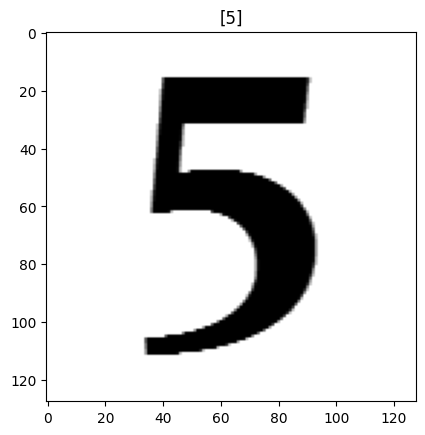

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 17ms/step
[[5.1429328e-02 5.4850250e-07 1.8800907e-07 1.4499507e-07 4.9324115e-07
  1.0569140e-02 9.2446321e-01 1.0077312e-06 1.3474703e-02 6.1283201e-05]]


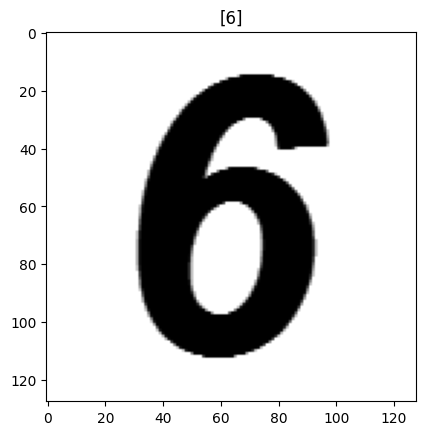

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 20ms/step
[[4.2215853e-09 1.3237272e-05 9.8060220e-03 1.7563782e-05 3.1729204e-08
  6.9031218e-11 4.6234607e-09 9.9016029e-01 1.4853804e-06 1.4231706e-06]]


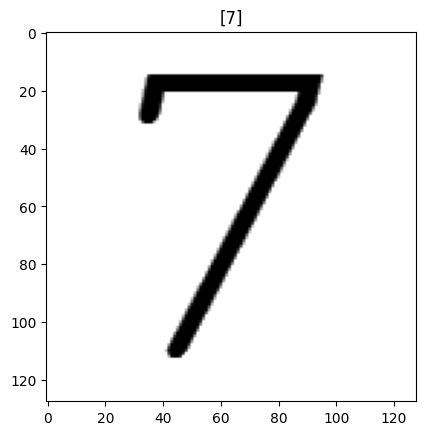

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 23ms/step
[[2.0726668e-15 3.6646796e-14 1.3072055e-10 4.1935344e-08 1.6315238e-13
  4.1548488e-12 2.3208065e-12 3.3896690e-14 1.0000000e+00 9.6923206e-11]]


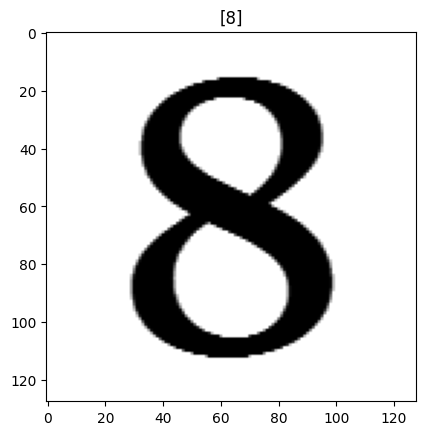

(128, 128)
(28, 28)
(28, 28, 1)
1/1 [==============================] - 0s 22ms/step
[[1.44029730e-06 6.68376265e-03 5.71459750e-05 6.95039099e-03
  2.06986487e-01 5.00261178e-03 1.30243666e-06 1.47849135e-03
  1.31619135e-02 7.59676456e-01]]


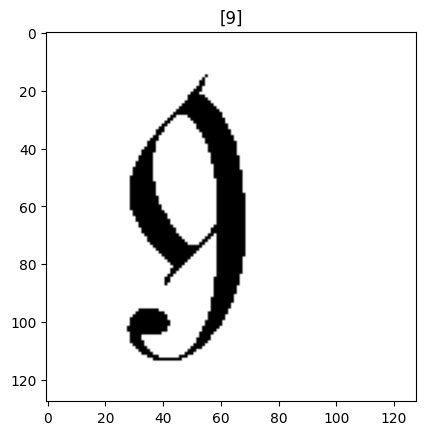

In [8]:
import os
import random
import matplotlib.pyplot as plt
#RESULTS
for dig in range(0, 10):
    imgs = os.listdir('datasets/digits/archive/Digits/'+str(dig))
    selected_img= random.choice(imgs)
    ori_img = cv2.imread('datasets/digits/archive/Digits/'+str(dig)+'/'+str(selected_img),  cv2.IMREAD_GRAYSCALE)

    print(ori_img.shape)
    img = cv2.resize(ori_img, (28, 28))
    
    img = 255 - img
    img = img.astype(np.float32) / 255.0
    img = img[:,:,np.newaxis]
    
    img = np.expand_dims(img, axis=0)
    probs = clf.predict(img)
    prediction = probs.argmax(axis=1)
    # cv2.imshow(str(prediction), ori_img)
    plt.imshow(ori_img, cmap='gray')
   
    plt.title(str(prediction))
    plt.show()
